## Week-5 activities

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [65]:
simple_df = pd.read_excel('dataset/w5-simple-regression-trainset.xlsx',sheet_name='Sheet1')

In [66]:
simple_df.shape

(20, 2)

In [67]:
simple_df.head(n=10)

,x,y
0,1,76
1,2,78
2,2,85
3,4,88
4,2,72
5,1,69
6,5,94
7,4,94
8,2,88
9,4,92


Task 1. Draw a linear regression line through the dataset `dataset/w5-simple-regression-trainset.xlsx`. Please note: the excel file contains data only in `Sheet1`. **Using Scikit-learn library allowed.**


In [68]:
x = simple_df.iloc[:,0]
y = simple_df.iloc[:,-1]

In [69]:
#These are vectors; but need to be matrices with proper dim, like (20,1)
x.shape, y.shape

((20,), (20,))

In [70]:
#needs reshaping so that it becomes (20,1)
n = x.shape[0]
x= x.values.reshape(-1,1)
y =y.values.reshape(-1,1)
x.shape, y.shape

((20, 1), (20, 1))

In [71]:
#building linear regression model with a little help from scikit-learn
from sklearn.linear_model import LinearRegression
reg_model_scikit = LinearRegression()
reg_model_scikit.fit(x,y)

LinearRegression()

In [74]:
beta_1 = reg_model_scikit.coef_
beta_0 = reg_model_scikit.intercept_
print(f'The regression model is: \n y_hat = {beta_0} + {beta_1}x')

The regression model is: 
 y_hat = [67.16168898] + [[5.25025747]]x


In [30]:
#have the model predict x
x_seq = np.linspace(0,8,100).reshape(-1,1) #for regression line plotting
y_pred = reg_model_scikit.predict(x_seq)

Text(0, 0.5, 'y')

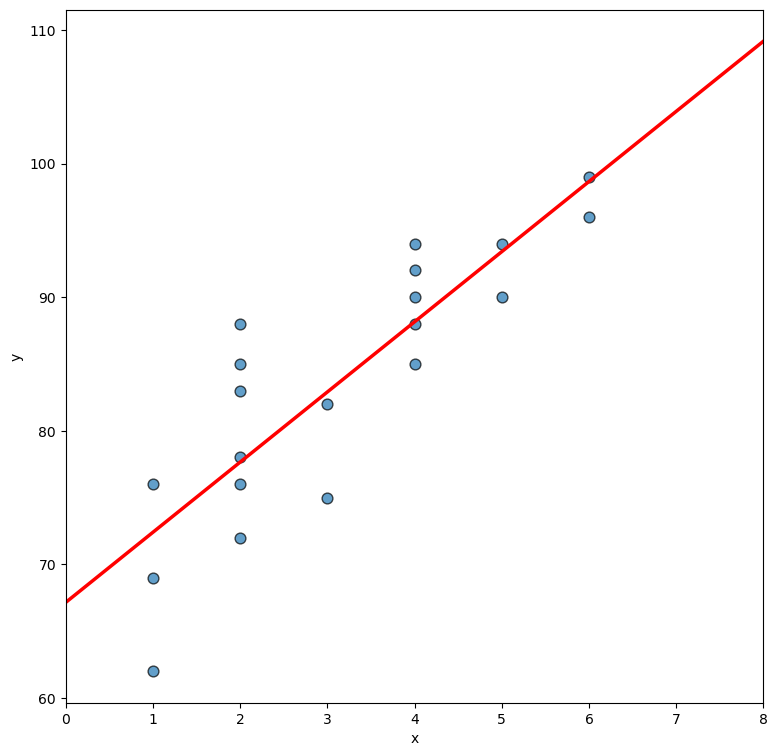

In [34]:
import matplotlib.pyplot as plt
# Initialize layout
fig, ax = plt.subplots(figsize=(9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
plt.xlim([0,8])

#generate x-axis points
# Plot regression line (in-red)
ax.plot(x_seq, y_pred, color="r", lw=2.5)
plt.xlabel('x')
plt.ylabel('y')


Task 2. Draw polynomial regression lines of degree 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100 through the dataset. Evaluate each of the models (including the model in #1) on the test set `datasets/w5-simple-testset.xlsx` in terms of RMSE and R2-score. Comments? **Using scikit-learn library allowed.**


In [39]:
test_df = pd.read_excel('dataset/w5-simple-regression-testset.xlsx',sheet_name='Sheet1')
test_df.shape

(6, 2)

In [40]:
test_df.head()

,x,y
0,1.5,69.00
1,2.5,80.33
2,3.5,78.50
3,4.5,89.80
4,5.5,92.00


In [41]:
#test set
x_test = test_df.iloc[:,0].values.reshape(-1,1)
y_test = test_df.iloc[:,-1].values.reshape(-1,1)

In [114]:
#degree
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)

In [115]:
x_train_poly = poly.fit_transform(x)

In [116]:
x_test_poly = poly.transform(x_test) #only transform x_test features

In [117]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train_poly,y) #training with polynomial features

LinearRegression()

In [118]:
x_test_seq = np.linspace(0,8,100).reshape(-1,1) #for regression line plotting
x_test_seq_poly = poly.transform(x_test_seq)

In [119]:
y_pred_seq = poly_reg_model.predict(x_test_seq_poly)

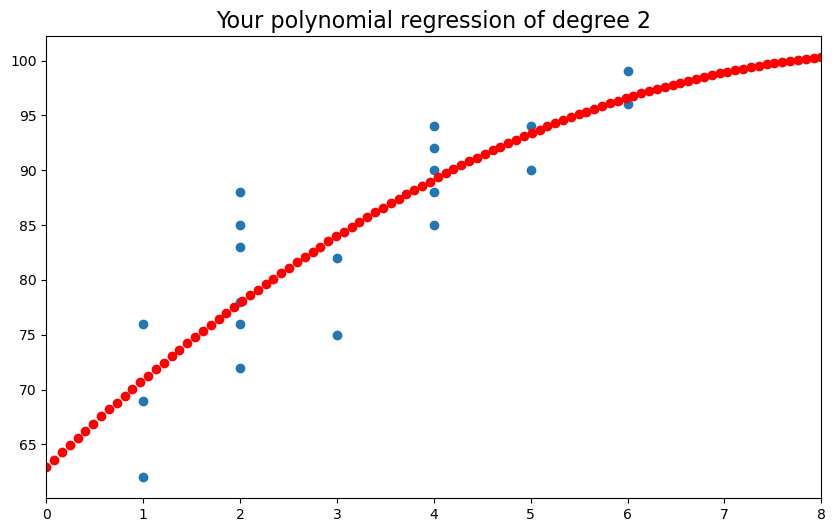

In [120]:
plt.figure (figsize= (10, 6))
plt.title (f"Your polynomial regression of degree {degree}", size=16)
plt.xlim([0,8])
plt.scatter(x, y)
plt.scatter(x_test_seq, y_pred_seq, c="red" )
plt.show ()

In [123]:
#evaluation


#first predict our test samples
y_pred = poly_reg_model.predict(x_test_poly)


In [126]:
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R-squared error = {r2_score(y_test, y_pred)}')

RMSE = 4.295550782086167
R-squared error = 0.7975952834094608


In [40]:
#Now let's try the same varying degrees of the regression polynomials
def polynomial_regression(x_train, y_train, x_test, y_test, degree=2):
    '''
    This function solves this task for (x,y) with polynomial regression of certain degree.
    Input: 
    x_train: input training feature (must be 1 dimensional)
    y_train: target feature (must be 1 dimensional)
    x_test: input test feature (must be 1 dimensional)
    y_test: target feature (must be 1 dimensional)
    degree: degree of the highest polynomial feature we want in the linear regression modeling

    Returns: nothing, but prints "nicely" the regression plot, RMSE, R-square"
    '''
    #make sure x and y are matrices of shape (n,1) instead of (n,)
    assert x_train.shape[1]==1, "shape of x_train must be (n,1)"
    assert y_train.shape[1]==1, "shape of y_train must be (n,1)"
    assert x_test.shape[1]==1, "shape of x_train must be (n,1)"
    assert y_test.shape[1]==1, "shape of y_train must be (n,1)"

    #Construct the sklearn.preprocessing.PolynomialFeatures instance
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    #transform the x_train dataset to include polynomial features
    x_train_poly = poly.fit_transform(x_train)
    
    #train the regression model with polynomial features
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(x_train_poly,y_train)

    #evaluate the regression model with test set
    #step 1: transform x_test to have polynomial features
    x_test_poly = poly.transform(x_test)
    #step 2: predict
    y_pred = poly_reg_model.predict(x_test_poly)
    #step 3: evaluate
    print(f'=========================================')
    print(f'Evaluation result with degree = {degree}')
    print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'R-squared = {r2_score(y_test, y_pred)}')
    print(f'If R-squared == 0, the model is performing equally as mean model')
    print(f'If R-squared > 0, the model is performing better than the mean model')
    print(f'If R-squared < 0, the model is worse than mean model')


    #Now, plot
    #Need some points for regression line
    x_test_seq = np.linspace(np.min(x_train)-1,np.max(x_train)+1,100).reshape(-1,1) #for regression line plotting
    x_test_seq_poly = poly.transform(x_test_seq)
    y_pred_seq = poly_reg_model.predict(x_test_seq_poly) #predict
    
    plt.figure (figsize= (10, 6))
    plt.title (f"Your polynomial regression of degree {degree}", size=16)
    plt.xlim([0,8])
    plt.scatter(x_train, y_train)
    plt.scatter(x_test_seq, y_pred_seq, c="red" )
    plt.show ()
    
    
    

    

In [31]:
train_df = pd.read_excel('dataset/w5-simple-regression-trainset.xlsx',sheet_name='Sheet1')
test_df = pd.read_excel('dataset/w5-simple-regression-testset.xlsx',sheet_name='Sheet1')
train_df.shape, test_df.shape

((20, 2), (6, 2))

In [32]:
x_train = train_df.iloc[:,0].values.reshape(-1,1)
y_train = train_df.iloc[:,-1].values.reshape(-1,1)
x_test = test_df.iloc[:,0].values.reshape(-1,1)
y_test = test_df.iloc[:,-1].values.reshape(-1,1)

Evaluation result with degree = 2
RMSE = 4.295550782086167
R-squared = 0.7975952834094608
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


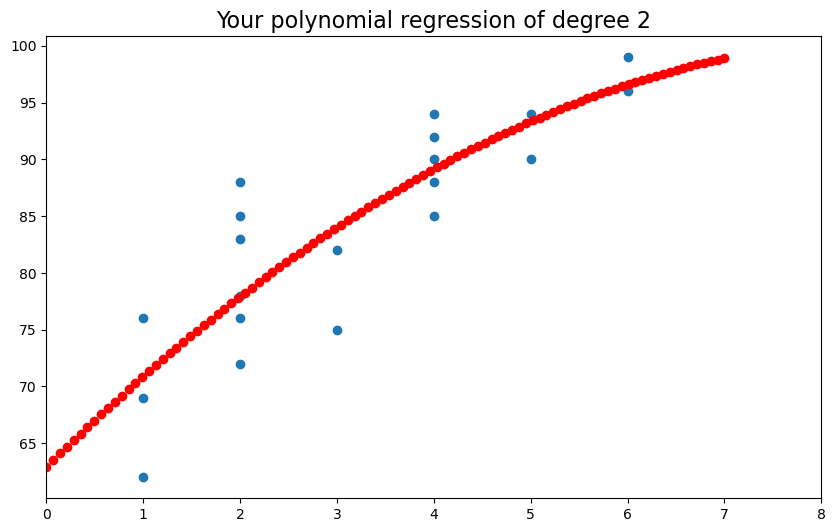

Evaluation result with degree = 3
RMSE = 4.600194916438484
R-squared = 0.7678678035763742
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


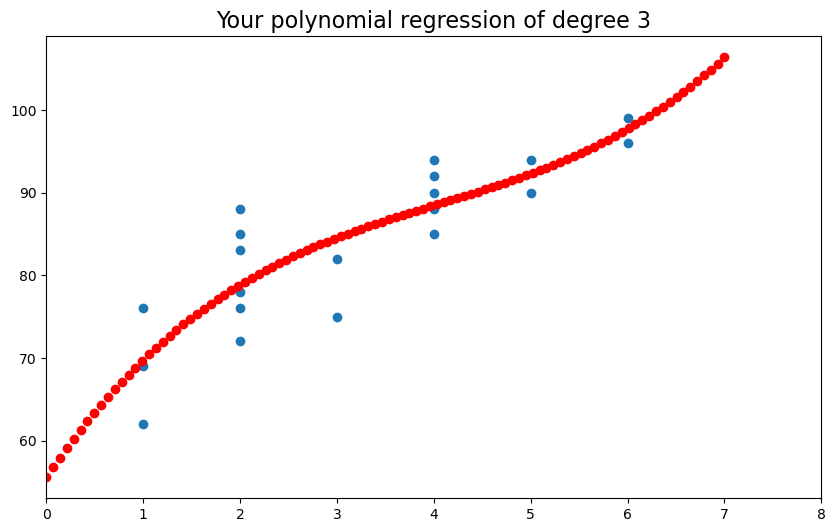

Evaluation result with degree = 4
RMSE = 4.787088451905648
R-squared = 0.7486228387897939
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


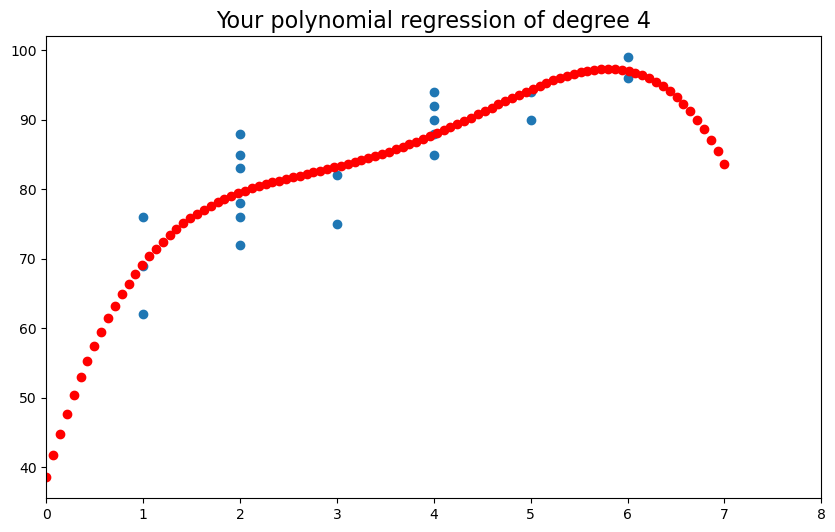

Evaluation result with degree = 5
RMSE = 16.595432203881217
R-squared = -2.021064851924587
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


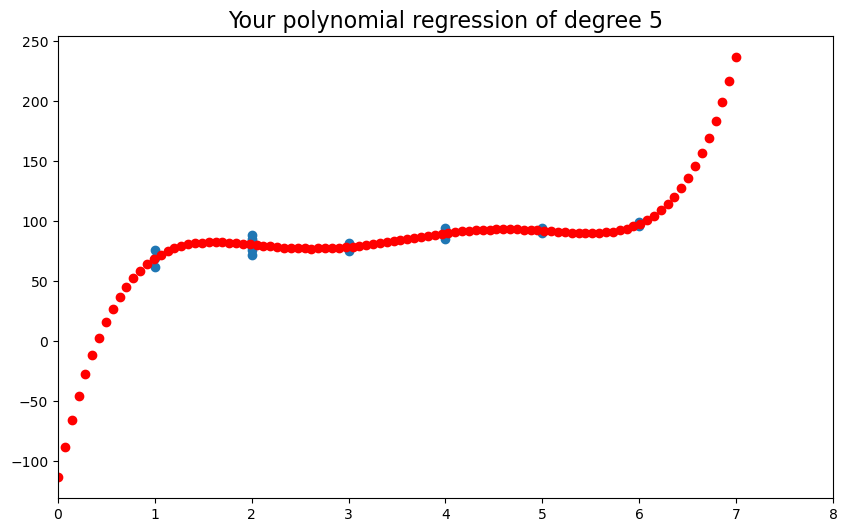

Evaluation result with degree = 6
RMSE = 27.90135746975463
R-squared = -7.539522356197223
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


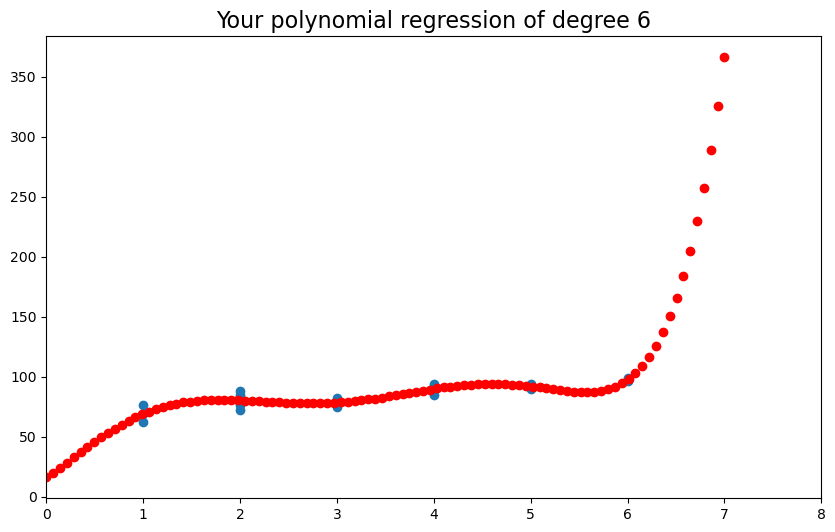

Evaluation result with degree = 7
RMSE = 53.987974584790294
R-squared = -30.97252847333413
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


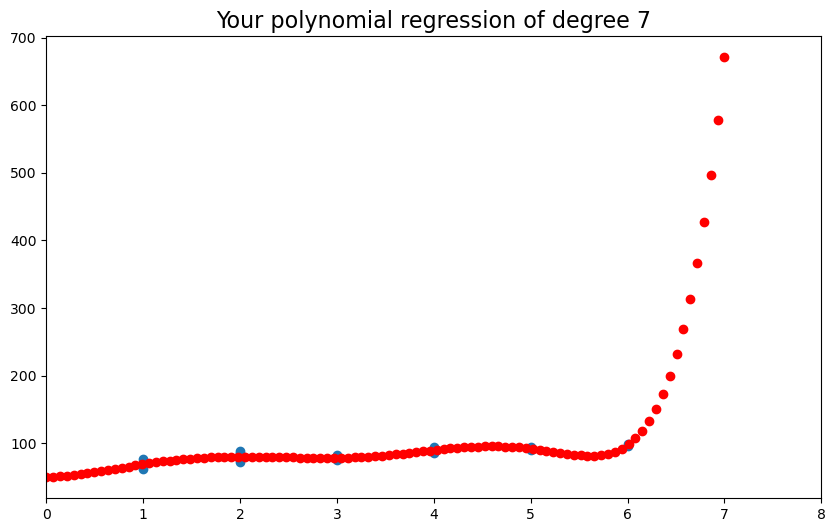

Evaluation result with degree = 8
RMSE = 119.08334429509344
R-squared = -154.55535227885056
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


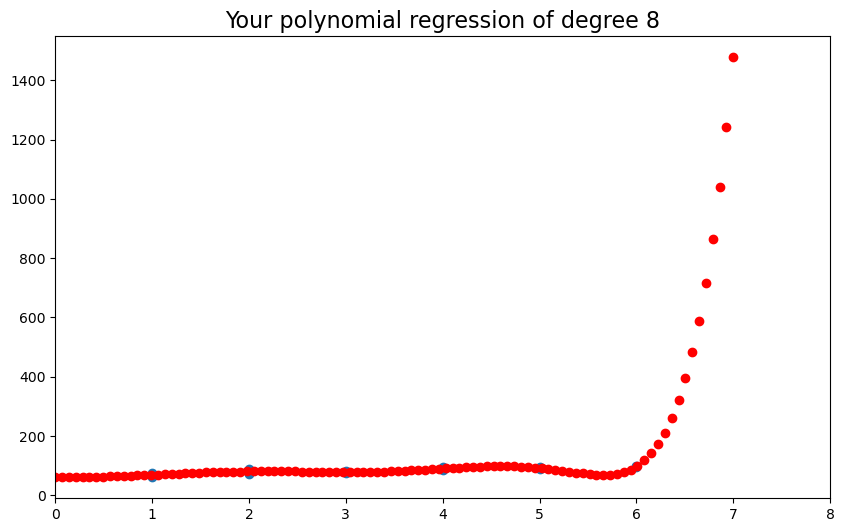

Evaluation result with degree = 9
RMSE = 299.5655133452787
R-squared = -983.3885265213557
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


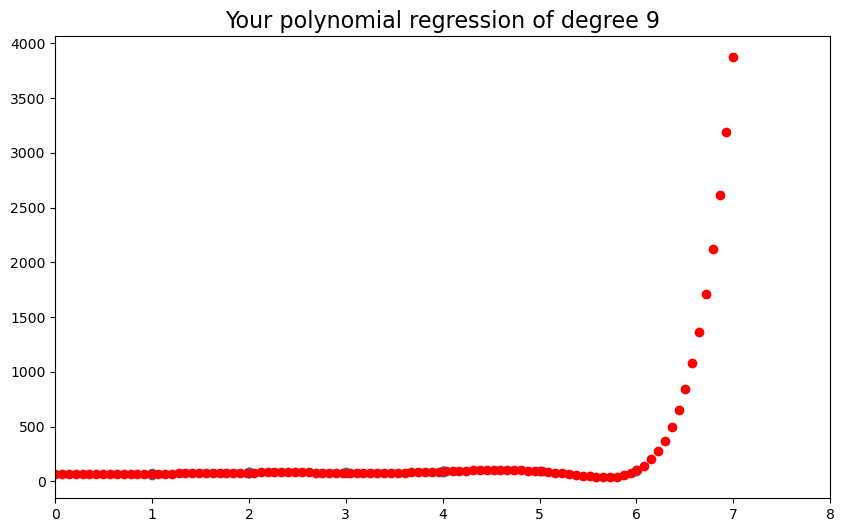

Evaluation result with degree = 10
RMSE = 844.5274539642772
R-squared = -7822.6688100097745
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


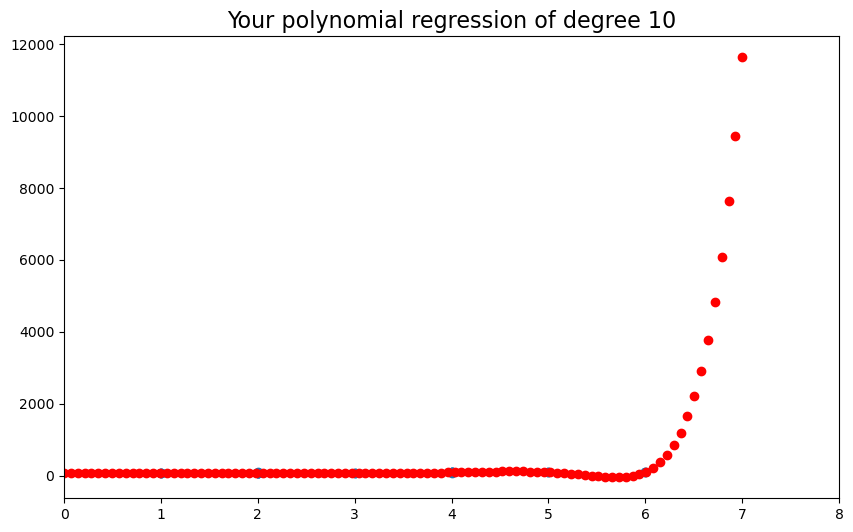

Evaluation result with degree = 20
RMSE = 110321617.20800234
R-squared = -133507035436193.11
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


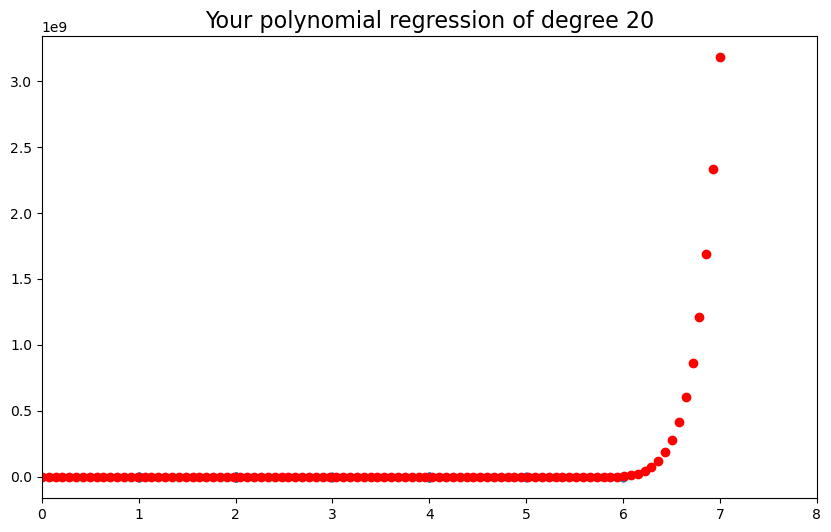

Evaluation result with degree = 50
RMSE = 24505337544.279865
R-squared = -6.587252201224317e+18
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


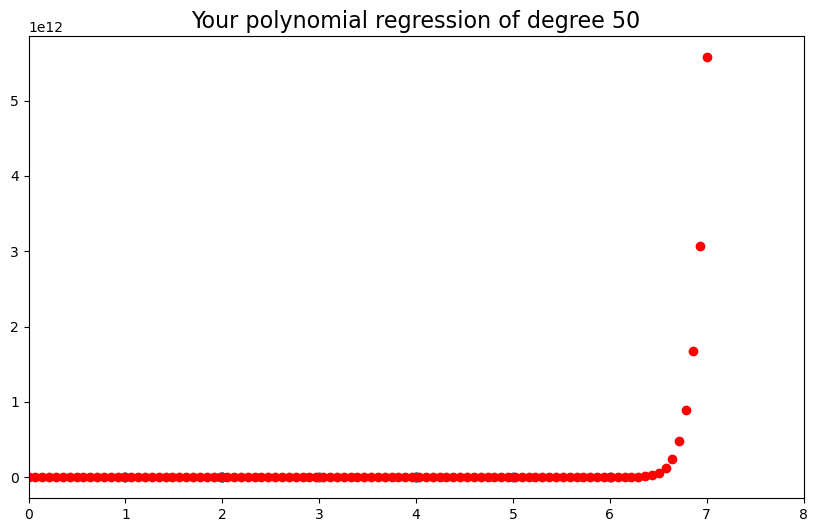

Evaluation result with degree = 100
RMSE = 423195758265.27844
R-squared = -1.9645610322371084e+21
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


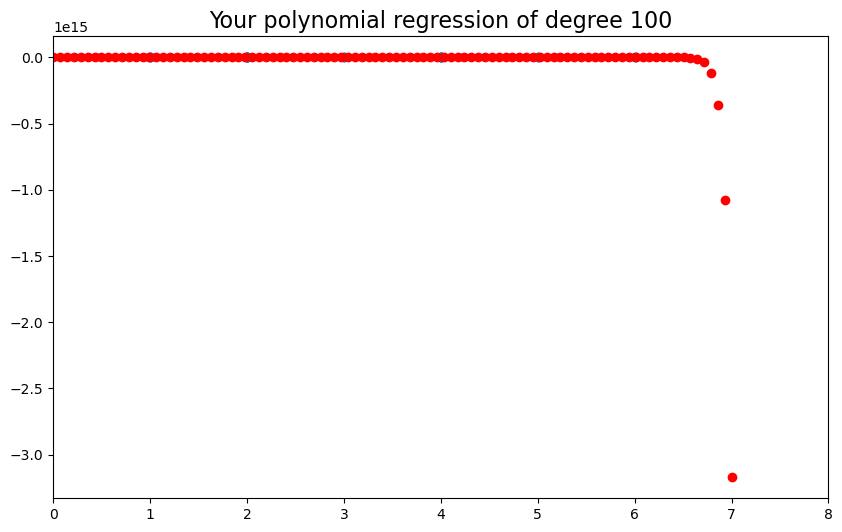

In [42]:
for degree in [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]:
    polynomial_regression(x_train,y_train,x_test,y_test, degree=degree)
    #break

Task 3. **Using scikit-learn library NOT ALLOWED**: Assuming you have gone through regression model lecture slides `Week-04-05--Regression-ML-Fall2024.pdf`. Build a simple linear regression model with the same `dataset/w5-simple-regression-trainset.xlsx` dataset in `Sheet1` with the following methods: i) closed form solution, ii) batch gradient descent, iii) stochastic gradient descent, iv) mini-batch gradient descent. And, compare your results with the evaluation metrics you got in #2.
   - For methods (ii)-(iv) vary value of learning rate and save all evaluation metrics.
   - For methods (iv) vary batch size and save all evaluation metrics.


In [43]:
train_df = pd.read_excel('dataset/w5-simple-regression-trainset.xlsx',sheet_name='Sheet1')
test_df = pd.read_excel('dataset/w5-simple-regression-testset.xlsx',sheet_name='Sheet1')
train_df.shape, test_df.shape

((20, 2), (6, 2))

In [44]:
x_train = train_df.iloc[:,0].values.reshape(-1,1)
y_train = train_df.iloc[:,-1].values.reshape(-1,1)
x_test = test_df.iloc[:,0].values.reshape(-1,1)
y_test = test_df.iloc[:,-1].values.reshape(-1,1)

In [57]:
#add bias term
X = np.hstack( (np.ones([x_train.shape[0],1], x_train.dtype), x_train) )


### i) closed-form ~ no scikit-learn (!)

In [99]:
beta = np.random.random_sample(size = (2,1)) #[beta_0, beta_1]^T
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y_train)

In [100]:
beta.shape

(2, 1)

In [101]:
print(f'Our regression model is: y_hat = {beta[0]} + {beta[1]}x')

Our regression model is: y_hat = [67.16168898] + [5.25025747]x


In [102]:
#Now, predict the test set with our model
x_test_with_bias = np.hstack( (np.ones([x_test.shape[0],1], x_test.dtype), x_test) )

In [103]:
x_test_with_bias.shape

(6, 2)

In [104]:
y_pred = np.dot(x_test_with_bias,beta)
y_pred.shape

(6, 1)

In [105]:
rmse = np.sqrt(np.sum((y_test-y_pred)**2)/len(y_test))
print(f'RMSE = {rmse}')

RMSE = 4.4273693764383895


In [106]:
r2score = 1 - (np.sum((y_test-y_pred)**2)/ np.sum((y_test-np.mean(y_test))**2))
print(f'R2-score = {r2score}')

R2-score = 0.7849821936348282


### ii) batch gradient descent ~ no scikit-learn (!)

In [155]:
#initialize beta
beta = np.random.random_sample(size = (X.shape[1],1)) #[beta_0, beta_1]^T
beta_old = beta.copy() #this will store beta scores from previous iteration

In [156]:
#num of sample
n = X.shape[0]
#learning rate
alpha = 0.01
reach_convergence = False
delta = 0 #distance between two betas
eps = 1e-4

In [157]:
#the gradient update loop
i = 0
while reach_convergence == False:
    gradient = (1/n)* np.dot(X.T , (np.dot(X,beta) - y_train))
    beta = beta - alpha * gradient

    #convergence test
    delta = np.sqrt(np.sum( (beta_old - beta)**2 ) )
    if delta < eps:
        reach_convergence = True
    if i % 1000 == 0:
        print(f'Epoch {i+1}: beta = [{beta[0]}, {beta[1]}, delta = {delta}')
    beta_old = beta
    i = i + 1
print(f'Epoch {i+1}: Batch Gradient Descent Algo Converged')
print(f'Solution: beta = [{beta[0]}, {beta[1]}, delta = {delta}')

Epoch 1: beta = [[1.10307886], [3.50099839], delta = 2.7697612852092486
Epoch 1001: beta = [[57.45076449], [7.7646724], delta = 0.0185298112726191
Epoch 2001: beta = [[65.62791422], [5.64739228], delta = 0.002926658197571621
Epoch 3001: beta = [[66.91943965], [5.31298222], delta = 0.0004622458415440944
Epoch 3832: Gradient Descent Algo Converged
Solution: beta = [[67.10932671], [5.26381544], delta = 9.991457601743403e-05


In [158]:
#now predict with it
y_pred_batch = np.dot(x_test_with_bias,beta)
y_pred_batch.shape

(6, 1)

In [159]:
rmse = np.sqrt(np.sum((y_test-y_pred_batch)**2)/len(y_test))
print(f'RMSE = {rmse}')

RMSE = 4.42767891178504


In [160]:
r2score = 1 - (np.sum((y_test-y_pred_batch)**2)/ np.sum((y_test-np.mean(y_test))**2))
print(f'R2-score = {r2score}')

R2-score = 0.7849521270502916


### ii) Stochastic Gradient Descent ~ no scikit-learn (!)

In [356]:
#initialize beta
beta = np.random.random_sample(size = (X.shape[1],1)) #[beta_0, beta_1]^T
beta_old = beta.copy() #this will store beta scores from previous iteration

In [357]:
#num of sample
n = X.shape[0]
#learning rate
alpha = 0.01
reach_convergence = False
delta = 0 #distance between two betas
eps = 1e-6

In [358]:
#shuffle training set, or keep a record of shuffled indices
indices = np.arange(n)
np.random.shuffle(indices)

In [359]:
#The gradient update loop
i = 0
iter = 0
num_epochs = 0
while reach_convergence == False:
    #grab a sample
    x_sample = X[indices[i],:].reshape(1,-1) #a row vector, not a column vector
    #compute gradient
    gradient =  np.dot(x_sample.T , (np.dot(x_sample,beta) - y_train[indices[i]]))
    beta = beta - alpha * gradient

    #convergence test
    delta = np.sqrt(np.sum( (beta_old - beta)**2 ) )
    if delta < eps:
        reach_convergence = True
    if iter % 1000 == 0:
        print(f'Step {iter+1}: beta = [{beta[0]}, {beta[1]}, delta = {delta}')
    beta_old = beta
    i = i + 1
    iter = iter + 1
    if i >= n: # next epoch begins
        np.random.shuffle(indices)
        num_epochs = num_epochs + 1
        i = 0 #reset
print(f'Step {iter+1}, Epoch {num_epochs}: Stochastic Gradient Descent Algo Converged')
print(f'Solution: beta = [{beta[0]}, {beta[1]}, delta = {delta}')

Step 1: beta = [[1.11834662], [4.15736498], delta = 3.3408180392373206
Step 1001: beta = [[57.76414172], [7.84585403], delta = 0.024535627136999437
Step 2001: beta = [[65.94334413], [5.80704355], delta = 0.24579256478014508
Step 3001: beta = [[67.04238885], [5.36442307], delta = 0.022103337087279205
Step 4001: beta = [[67.13150761], [5.20550965], delta = 0.2176768586116691
Step 5001: beta = [[67.28540451], [5.37511748], delta = 0.06031286739679464
Step 6001: beta = [[67.20463327], [5.17733116], delta = 0.04880428541463026
Step 7001: beta = [[67.29677221], [5.46914715], delta = 0.22984268534180602
Step 8001: beta = [[67.08675812], [4.82562674], delta = 0.23062274314743247
Step 9001: beta = [[67.23060564], [5.28819573], delta = 0.16807311380668472
Step 10001: beta = [[67.19523653], [5.14008675], delta = 0.012141625385344903
Step 11001: beta = [[67.21516684], [5.38460617], delta = 0.049067827878034126
Step 12001: beta = [[67.18563746], [5.03402241], delta = 0.16232449514767106
Step 13001:

In [360]:
#now predict with it
y_pred_stochastic = np.dot(x_test_with_bias,beta)
y_pred_stochastic.shape

(6, 1)

In [361]:
rmse = np.sqrt(np.sum((y_test-y_pred_stochastic)**2)/len(y_test))
print(f'RMSE = {rmse}')

RMSE = 4.299295212538284


In [362]:
r2score = 1 - (np.sum((y_test-y_pred_stochastic)**2)/ np.sum((y_test-np.mean(y_test))**2))
print(f'R2-score = {r2score}')

R2-score = 0.7972422573369781


### iii) Mini-batch Gradient Descent ~ no scikit-learn (!)

In [363]:
#initialize beta
beta = np.random.random_sample(size = (X.shape[1],1)) #[beta_0, beta_1]^T
beta_old = beta.copy() #this will store beta scores from previous iteration

In [367]:
#num of sample
n = X.shape[0]
#learning rate
alpha = 0.01
reach_convergence = False
delta = 0 #distance between two betas
eps = 1e-3
b = 5 #batch_size

In [368]:
#shuffle training set, or keep a record of shuffled indices
indices = np.arange(n)
np.random.shuffle(indices)

In [369]:
#create the batch of indices
batch_of_indices = []
if n%b == 0:
    num_of_batches = int(n / b)
else:
    num_of_batches = n // b + 1
idx = 0
for _ in range(num_of_batches):
    batch_of_indices.append(indices[idx:idx+b])
    idx = idx + b

In [370]:
i = 0
iter = 0
num_epochs = 0
while reach_convergence == False:
    #grab a batch of samples
    X_sample = X[batch_of_indices[i],:]
    y_sample = y_train[batch_of_indices[i]].reshape(-1,1)
    #print(f'X_sample.shape = {X_sample.shape}, y_sample.shape = {y_sample.shape}')
    
    #compute gradient
    gradient = (1/b)* np.dot(X_sample.T , (np.dot(X_sample,beta) - y_sample))
    beta = beta - alpha * gradient

    #convergence test
    delta = np.sqrt(np.sum( (beta_old - beta)**2 ) )
    if delta < eps:
        reach_convergence = True
    if iter % 1000 == 0:
        print(f'Step {iter+1}: beta = [{beta[0]}, {beta[1]}, delta = {delta}')
    beta_old = beta
    i = i + 1
    iter = iter + 1
    if i >= num_of_batches: # next epoch begins
        np.random.shuffle(indices)
        #create the batch of indices (again)
        batch_of_indices = []
        if n%b == 0:
            num_of_batches = int(n / b)
        else:
            num_of_batches = n // b + 1
        idx = 0
        for _ in range(num_of_batches):
            batch_of_indices.append(indices[idx:idx+b])
            idx = idx + b
        #increment epoch counter
        num_epochs = num_epochs + 1
        i = 0 #reset
print(f'Step {iter+1}, Epoch {num_epochs}: Mini-batch Gradient Descent Algo (with batch_size = {b}) Converged')
print(f'Solution: beta = [{beta[0]}, {beta[1]}, delta = {delta}')

Step 1: beta = [[0.87033536], [4.19877798], delta = 3.358031493454135
Step 1001: beta = [[57.53317309], [7.69414557], delta = 0.055793565291017
Step 1482, Epoch 370: Mini-batch Gradient Descent Algo (with batch_size = 5) Converged
Solution: beta = [[63.21380746], [6.25087877], delta = 0.0002670836734078515


In [371]:
#now predict with it
y_pred_minibatch = np.dot(x_test_with_bias,beta)
y_pred_minibatch.shape

(6, 1)

In [372]:
rmse = np.sqrt(np.sum((y_test-y_pred_minibatch)**2)/len(y_test))
print(f'RMSE = {rmse}')

RMSE = 4.6989518536605415


In [373]:
r2score = 1 - (np.sum((y_test-y_pred_minibatch)**2)/ np.sum((y_test-np.mean(y_test))**2))
print(f'R2-score = {r2score}')

R2-score = 0.7577939965294904


Task 4. Build a regression model for dataset in `dataset/w5-multi-regression-trainset.xlsx`. Please note it's a multiple linear regression task. **Using scikit-learn library allowed**. Evaluate the model on the provided test set, `dataset/w5-multi-regression-testset.xlsx` in terms of RMSE and R2-score.


In [ ]:
#It's similar code structure as in task #2. DIY

Task 5. Now, do the same as in task #4 without scikit-learn library. Apply the 4 solution approaches: (i) closed-form solution, (ii) batch gradient descent, (iii) stochastic gradient descent, (iv) mini-batch gradient descent. Don't forget to tune the *hyper-parameters* like learning rate.. Compare with results obtained in task #4.

In [ ]:
#It's similar code structure as in task #3. DIY